# Introduction to iMinuit / Probfit

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import iminuit
import probfit

# straigth line

<Container object of 3 artists>

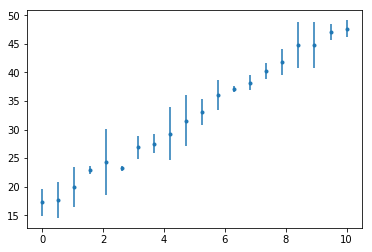

In [2]:
# Let's make a straight line with gaussian(mu=0, sigma=1) noise
np.random.seed(0)
x = np.linspace(0, 10, 20) 
y = 3.3 * x + 15.5 + np.random.randn(len(x))
err = 2*np.ones(len(x))+ 1.7*np.random.randn(len(x))
fig, ax = plt.subplots()
ax.errorbar(x, y, err, fmt='.')

In [3]:
# Let's define our line.
# First argument has to be the independent variable,
# arguments after that are shape parameters.
def line(x, m, c): # define it to be parabolic or whatever you like
    return m * x + c

In [4]:
iminuit.describe(line)

['x', 'm', 'c']

In [5]:
# Define a chi^2 cost function
chi2 = probfit.Chi2Regression(line, x, y)

# Chi2Regression is just a callable object; nothing special about it
iminuit.describe(chi2)

['m', 'c']

In [6]:
# minimize it
# yes, it gives you a heads up that you didn't give it initial value
# we can ignore it for now
firstFit = iminuit.Minuit(chi2,m=1) 
firstFit.migrad();

/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:4: InitialParamWarning: Parameter m is floating but does not have initial step size. Assume 1.
  after removing the cwd from sys.path.
/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:4: InitialParamWarning: Parameter c does not have initial value. Assume 0.
  after removing the cwd from sys.path.
/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:4: InitialParamWarning: Parameter c is floating but does not have initial step size. Assume 1.
  after removing the cwd from sys.path.


FCN = 12.073853113538101 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 4.868627149077389e-22 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,m,3.18628,0.0736788,0,0,,,
2,c,16.6379,0.430946,0,0,,,


In [7]:
def cust_chi2(m,c):
    """
    here the arrays x,y and err are external
    and must be defined before this block
    """
    chi2_array =np.array([])
    expected = line(x,m,c)
    observed = y
    c = ((observed)- expected)**2 / err**2
    chi2_array = np.append(chi2_array,c)
    return np.nansum(chi2_array)

In [8]:
secondFit = iminuit.Minuit(cust_chi2, 
         m=3.0, error_m=0.01,     limit_m=(2.5,4.),
         c=15., error_c=.01,     limit_c=(12.,37.))

secondFit.migrad()

/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:3: InitialParamWarning: errordef is not given. Default to 1.
  This is separate from the ipykernel package so we can avoid doing imports until


FCN = 16.70520746743983 
 TOTAL NCALL = 44 
 NCALLS = 44 
 
 
 EDM = 7.345833879414059e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,m,3.29616,0.104325,0,0,2.5,4.0,
2,c,15.8003,0.546941,0,0,12.0,37.0,


({'fval': 16.70520746743983, 'edm': 7.345833879414059e-06, 'nfcn': 44, 'up': 1.0, 'is_valid': True, 'has_valid_parameters': True, 'has_accurate_covar': True, 'has_posdef_covar': True, 'has_made_posdef_covar': False, 'hesse_failed': False, 'has_covariance': True, 'is_above_max_edm': False, 'has_reached_call_limit': False},
 [{'number': 0, 'name': 'm', 'value': 3.296155601219667, 'error': 0.10432549723456841, 'is_const': False, 'is_fixed': False, 'has_limits': True, 'has_lower_limit': True, 'has_upper_limit': True, 'lower_limit': 2.5, 'upper_limit': 4.0},
  {'number': 1, 'name': 'c', 'value': 15.80026679365694, 'error': 0.5469408219526954, 'is_const': False, 'is_fixed': False, 'has_limits': True, 'has_lower_limit': True, 'has_upper_limit': True, 'lower_limit': 12.0, 'upper_limit': 37.0}])

In [9]:
# The output above is a pretty-printed summary of the fit results from
# minuit.print_fmin()
# which was automatically called by iminuit.Minuit.migrad() after running MIGRAD.

# Let's see our results as Python dictionaries ...
print("First fit")
print(firstFit.values)
print(firstFit.errors)
print("Second fit")
print(secondFit.values)
print(secondFit.errors)

First fit
{'m': 3.186277414482234, 'c': 16.63794752053378}
{'m': 0.07367884111438719, 'c': 0.43094581054116105}
Second fit
{'m': 3.296155601219667, 'c': 15.80026679365694}
{'m': 0.10432549723456841, 'c': 0.5469408219526954}


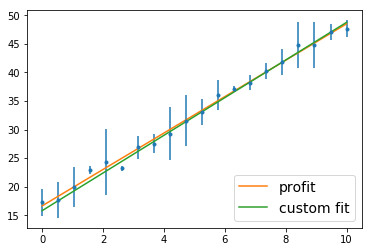

In [10]:
fig, ax = plt.subplots()
ax.errorbar(x, y, err, fmt='.')
ax.plot(x,line(x,firstFit.values['m'],firstFit.values['c']),label="profit")
ax.plot(x,line(x,secondFit.values['m'],secondFit.values['c']),label="custom fit")
legend = ax.legend(loc='lower right', ncol=1, shadow=False, fontsize=14)

# Gaussian 

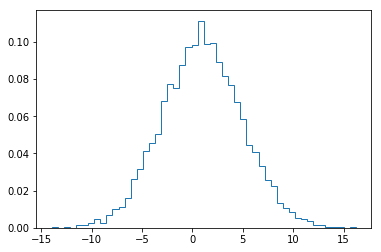

In [11]:
# First let's make some example data
np.random.seed(0)
data = np.random.randn(10000) * 4 + 1
# sigma = 4 and mean = 1
fig, ax = plt.subplots()
hist, bins,_ = ax.hist(data, bins=50, histtype='step',normed=True)

In [12]:
# Define your PDF / model
def gauss_pdf(x, mu, sigma):
    """Normalized Gaussian"""
    return 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu) ** 2 / 2. / sigma ** 2)

In [13]:
# Build your cost function
# Here we use binned likelihood
binned_likelihood = probfit.BinnedLH(gauss_pdf, data)

In [14]:
# Create the minuit
# and give an initial value for the sigma parameter
gaus_1st = iminuit.Minuit(binned_likelihood, sigma=3)
# Remember: minuit.errordef is automatically set to 0.5
# as required for likelihood fits (this was explained above)

/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter mu does not have initial value. Assume 0.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter mu is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
gaus_1st.migrad()
# Like in all binned fit with long zero tail. It will have to do something about the zero bin
# probfit.BinnedLH does handle them gracefully but will give you a warning;

/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:1: LogWarning: x is really small return 0
  """Entry point for launching an IPython kernel.


FCN = 20.936816655253306 
 TOTAL NCALL = 46 
 NCALLS = 46 
 
 
 EDM = 1.4538181261375696e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mu,0.925875,0.039626,0,0,,,
2,sigma,3.95238,0.0282674,0,0,,,


({'fval': 20.936816655253306, 'edm': 1.4538181261375696e-06, 'nfcn': 46, 'up': 0.5, 'is_valid': True, 'has_valid_parameters': True, 'has_accurate_covar': True, 'has_posdef_covar': True, 'has_made_posdef_covar': False, 'hesse_failed': False, 'has_covariance': True, 'is_above_max_edm': False, 'has_reached_call_limit': False},
 [{'number': 0, 'name': 'mu', 'value': 0.9258754454754967, 'error': 0.03962599040295913, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': False, 'lower_limit': 0.0, 'upper_limit': 0.0},
  {'number': 1, 'name': 'sigma', 'value': 3.952381323607855, 'error': 0.02826740732189662, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': False, 'lower_limit': 0.0, 'upper_limit': 0.0}])

In [16]:
bins_x = (bins[:-1]+bins[1:])/2

def cust_gauss(mu,sigma):
    chi2_array =np.array([])
    expected = gauss_pdf(bins_x, mu, sigma)
    observed = hist
    c = ((observed)- expected)**2 / expected
    chi2_array = np.append(chi2_array,c)
    return np.nansum(chi2_array)

gaus_2st = iminuit.Minuit(cust_gauss, 
         mu=.5, error_mu=0.01,     limit_mu=(-4.,4.),
         sigma=4., error_sigma=.01,     limit_sigma=(1.,10.))

gaus_2st.migrad();

/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/ipykernel_launcher.py:13: InitialParamWarning: errordef is not given. Default to 1.
  del sys.path[0]


FCN = 0.008711453319654769 
 TOTAL NCALL = 30 
 NCALLS = 30 
 
 
 EDM = 8.601299679508905e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mu,0.927186,2.77319,0,0,-4.0,4.0,
2,sigma,3.97745,2.09,0,0,1.0,10.0,


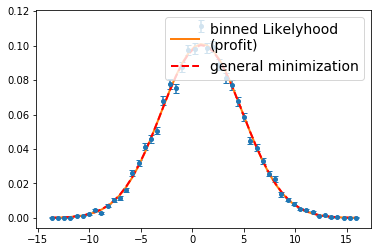

In [17]:
# generate canvas
fig, ax = plt.subplots()
# plot data
hist, bins= np.histogram(data, bins=50,normed=True)
ax.errorbar(bins_x,hist, yerr=np.sqrt(hist/len(data)),fmt='o',capsize=3,
            markersize=4
           )
# plot the two fits
ax.plot(bins_x,gauss_pdf(bins_x,gaus_1st.values['mu'],gaus_1st.values['sigma']),lw=2,label="binned Likelyhood\n(profit)")
ax.plot(bins_x,gauss_pdf(bins_x,gaus_2st.values['mu'],gaus_2st.values['sigma']),'r--', lw=2,label="general minimization")
# generate legend
ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=14)

/home/simon/.pyenv/versions/3.6.3/envs/iminuit/lib/python3.6/site-packages/iminuit/_plotting.py:86: LogWarning: x is really small return 0
  sigma=this_sig)


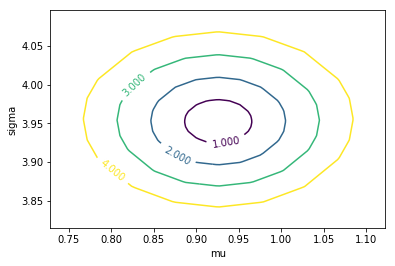

In [18]:
#drawing it nicely
fig, ax = plt.subplots()
gaus_1st.draw_mncontour('mu','sigma', nsigma=4);

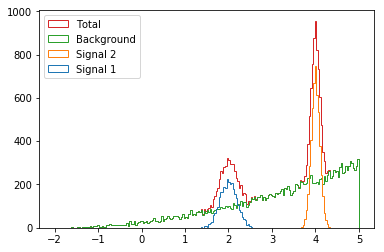

In [19]:
np.random.seed(0)
data_peak1 = np.random.randn(3000) * 0.2 + 2
data_peak2 = np.random.randn(5000) * 0.1 + 4
data_range = (-2, 5)
data_bg = probfit.gen_toy(lambda x : 4 + 4 * x + x ** 2, 20000, data_range)
data_all = np.concatenate([data_peak1, data_peak2, data_bg])
fig, ax = plt.subplots()
ax.hist((data_peak1, data_peak2, data_bg, data_all),
         label=['Signal 1', 'Signal 2', 'Background', 'Total'],
         bins=200, histtype='step', range=data_range)
ax.legend(loc='upper left')

In [20]:
# Using a polynomial to fit a distribution is problematic, because the
# polynomial can assume negative values, which results in NaN (not a number)
# values in the likelihood function.
# To avoid this problem we restrict the fit to the range (0, 5) where
# the polynomial is clearly positive.
fit_range = (0, 5)
normalized_poly = probfit.Normalized(probfit.Polynomial(2), fit_range)
normalized_poly = probfit.Extended(normalized_poly, extname='NBkg')

gauss1 = probfit.Extended(probfit.rename(probfit.gaussian, ['x', 'mu1', 'sigma1']), extname='N1')
gauss2 = probfit.Extended(probfit.rename(probfit.gaussian, ['x', 'mu2', 'sigma2']), extname='N2')

# Define an extended PDF consisting of three components
pdf = probfit.AddPdf(normalized_poly, gauss1, gauss2)

print('normalized_poly: {}'.format(probfit.describe(normalized_poly)))
print('gauss1:          {}'.format(probfit.describe(gauss1)))
print('gauss2:          {}'.format(probfit.describe(gauss2)))
print('pdf:             {}'.format(probfit.describe(pdf)))

normalized_poly: ['x', 'c_0', 'c_1', 'c_2', 'NBkg']
gauss1:          ['x', 'mu1', 'sigma1', 'N1']
gauss2:          ['x', 'mu2', 'sigma2', 'N2']
pdf:             ['x', 'c_0', 'c_1', 'c_2', 'NBkg', 'mu1', 'sigma1', 'N1', 'mu2', 'sigma2', 'N2']


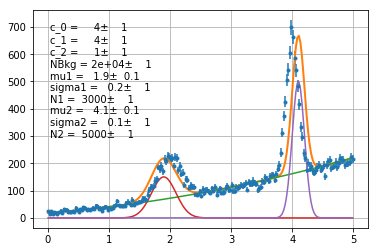

In [21]:
# Define the cost function in the usual way ...
binned_likelihood = probfit.BinnedLH(pdf, data_all, bins=200, extended=True, bound=fit_range)

# This is a quite complex fit (11 free parameters!), so we need good starting values.
# Actually we even need to set an initial parameter error
# for 'mu1' and 'mu2' to make MIGRAD converge.
# The initial parameter error is used as the initial step size in the minimization.
pars = dict(mu1=1.9, error_mu1=0.1, sigma1=0.2, N1=3000,
            mu2=4.1, error_mu2=0.1, sigma2=0.1, N2=5000,
            c_0=4, c_1=4, c_2=1, NBkg=20000)
# define iminuit object
two_gaussians = iminuit.Minuit(binned_likelihood, pedantic=False, print_level=0, **pars)
# You can see that the model already roughly matches the data
fig, ax = plt.subplots()
binLik=binned_likelihood.draw(two_gaussians, parts=True)

In [22]:
# This can take a while ... the likelihood is evaluated a few 100 times
# (and each time the distributions are evaluated, including the
# numerical computation of the normalizing integrals)
two_gaussians.migrad()

({'fval': 88.54820693214461, 'edm': 2.5065888390418453e-06, 'nfcn': 331, 'up': 0.5, 'is_valid': True, 'has_valid_parameters': True, 'has_accurate_covar': False, 'has_posdef_covar': False, 'has_made_posdef_covar': True, 'hesse_failed': False, 'has_covariance': True, 'is_above_max_edm': False, 'has_reached_call_limit': False},
 [{'number': 0, 'name': 'c_0', 'value': 4.156499373318717, 'error': 3.2751834621577958, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': False, 'lower_limit': 0.0, 'upper_limit': 0.0},
  {'number': 1, 'name': 'c_1', 'value': 3.7612956378275397, 'error': 3.028132501826774, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': False, 'lower_limit': 0.0, 'upper_limit': 0.0},
  {'number': 2, 'name': 'c_2', 'value': 0.9724907147371848, 'error': 0.7669779247607722, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': 

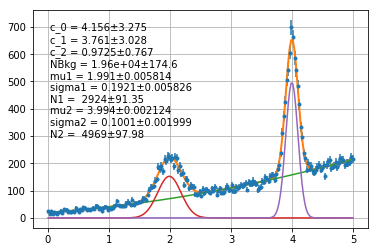

In [23]:
fig, ax = plt.subplots()
binLik=binned_likelihood.show(two_gaussians, parts=True)

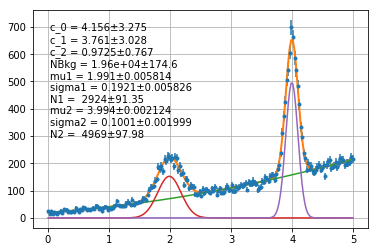

In [24]:
# You should copy & paste the return tuple from the `draw` docstring ...
((data_edges, datay), (errorp, errorm), (total_pdf_x, total_pdf_y), parts) = binned_likelihood.draw(two_gaussians, parts=True);
# ... now we have everything to make our own plot

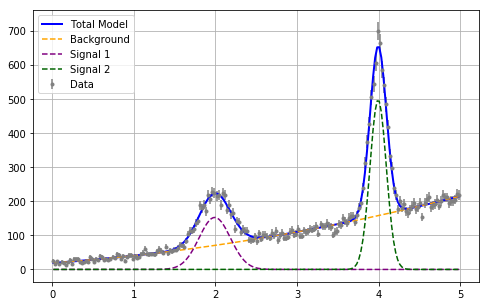

In [25]:
# Now make the plot as pretty as you like, e.g. with matplotlib.
plt.figure(figsize=(8, 5))
plt.errorbar(probfit.mid(data_edges), datay, errorp, fmt='.', capsize=0, color='Gray', label='Data')
plt.plot(total_pdf_x, total_pdf_y, color='blue', lw=2, label='Total Model')
colors = ['orange', 'purple', 'DarkGreen']
labels = ['Background', 'Signal 1', 'Signal 2']
for color, label, part in zip(colors, labels, parts):
    x, y = part
    plt.plot(x, y, ls='--', color=color, label=label)
plt.grid(True)
plt.legend(loc='upper left')